In [1]:
# getting the necessary libraries..
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols=['Variety','Alcohol',' Malic acid','Ash','Alcalinity of ash ', 'Magnesium',' Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
path="wine.txt"
wine=pd.read_csv(path,names=cols)
wine.head(n=6)


,Variety,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
wine_class=wine['Variety']
wine.drop('Variety',axis=1,inplace=True)

In [4]:
x=wine.get('Alcohol')
x

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

In [5]:
y=wine[['Flavanoids','Nonflavanoid phenols']]
y

,Flavanoids,Nonflavanoid phenols
0,3.06,0.28
1,2.76,0.26
2,3.24,0.30
3,3.49,0.24
4,2.69,0.39
...,...,...
173,0.61,0.52
174,0.75,0.43
175,0.69,0.43
176,0.68,0.53


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1    Malic acid                   178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5    Total phenols                178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [7]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


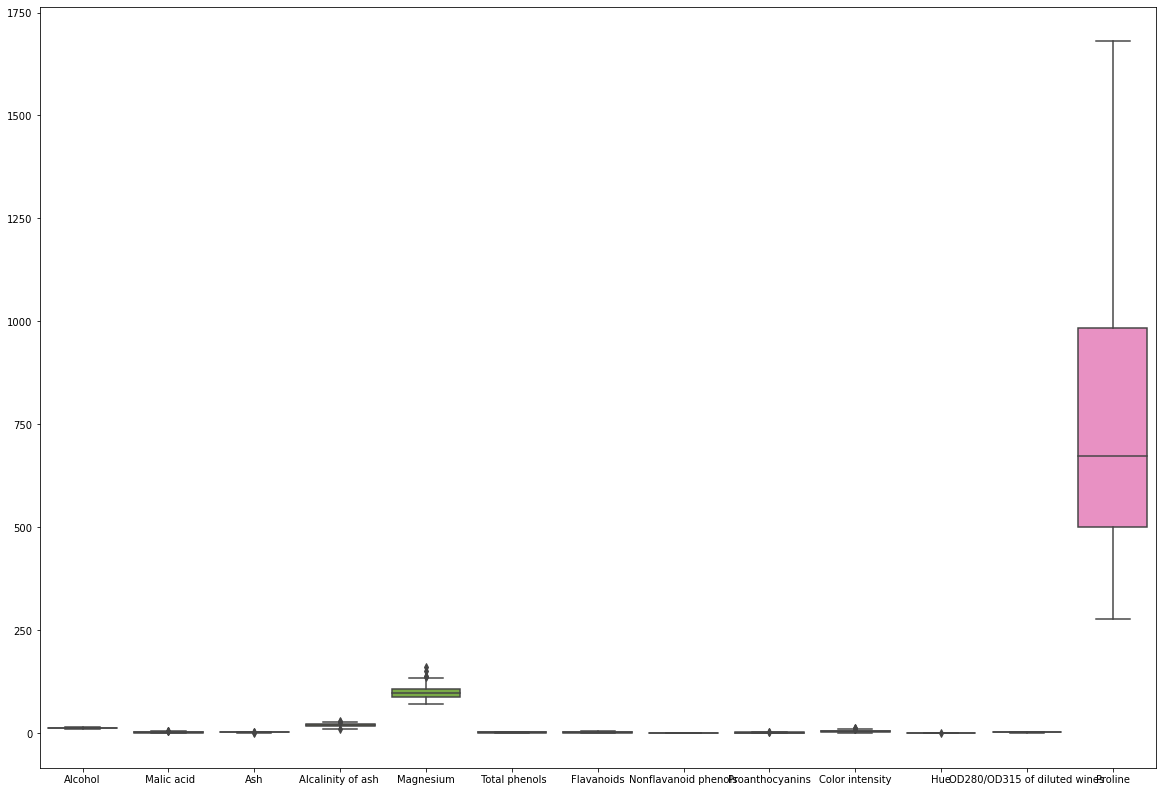

In [8]:

plt.figure(figsize=(20, 14))
sns.boxplot(data=wine)
plt.show()#display dist..

In [9]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine)

df=pd.DataFrame({'labels':labels , 'class':wine_class})
ct=pd.crosstab(df['labels'],df['class'])
ct

class,1,2,3
labels,,,
0,0,50,19
1,46,1,0
2,13,20,29


In [10]:
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1    Malic acid                   178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5    Total phenols                178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [12]:
#rename columns
wine=wine.rename(columns={"Nonflavanoid phenols": "Nonflavanoid"})

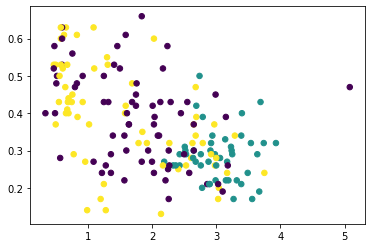

In [13]:
xs=wine.Flavanoids
ys=wine.Nonflavanoid
_=plt.scatter(xs,ys,c=labels, s=30 )

In [14]:
_=plt.scatter(wine_scaled['Flavanoids'],wine_scaled['Nonflavanoid phenols'], s=30)

NameError: name 'wine_scaled' is not defined

In [ ]:
xs=wine.loc[:,'Flavanoids']
ys=wine.loc[:,'Nonflavanoid']
_=plt.scatter(xs,ys,c=labels, s=30 )

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#wine_scaled=pd.DataFrame(wine)
wine_scaled = normalize(wine)
wine_scaled=pd.DataFrame(wine_scaled)
wine_scaled 

In [ ]:
sc = StandardScaler()
wine_scaled = sc.fit_transform(wine)  #.var(axis=0)

wine_scaled#.var(axis=0)
wine_scaled

In [ ]:
wine_scaled=pd.DataFrame(wine_scaled)

wine_scaled.columns=['Alcohol',' Malic acid','Ash','Alcalinity of ash ', 'Magnesium',' Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

wine_scaled

In [ ]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(wine_scaled)

df=pd.DataFrame({'labels':labels , 'class':wine_class})
ct=pd.crosstab(df['labels'],df['class'])
ct

In [ ]:
xs=wine_scaled.iloc[:,6]
ys=wine_scaled.iloc[:,7]
_=plt.scatter(xs,ys,c=labels)

In [ ]:
wine_scal_fla_no=wine_scaled.loc[:,['Flavanoids', 'Nonflavanoid phenols']]

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

plt.figure(figsize=(12, 12))
dendrogram = sch.dendrogram(sch.linkage(wine_o, method = 'ward'))#wine_scal_fla_no
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(wine_scal_fla_no)

In [ ]:
v,m=5,6
print(v**m)

In [ ]:
sample_rows=euro.iloc[:,2:]

In [ ]:
#rename columns
euro=euro.rename(columns={"From country": "From_country", "To country": "To_country"})

In [ ]:
#drop unwanted columns
euro.drop(['Unnamed: 0',"Jury Points", "Televote Points"], axis=1, inplace = True) #drop columns

In [ ]:
#fetch file path and display df
path="eurovision_data.txt"
euro=pd.read_csv(path)
euro.head(n=6)

In [ ]:
euro.fillna(euro.mean(),inplace=True)

In [ ]:
#explore the attributes distribution
plt.figure(figsize=(12, 12))
sns.boxplot(data=euro)
plt.show()#display dist.